In [37]:
import numpy as np

def true_fun(X):
  return np.sin(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 40
X = np.random.rand(n_samples)
X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1
X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

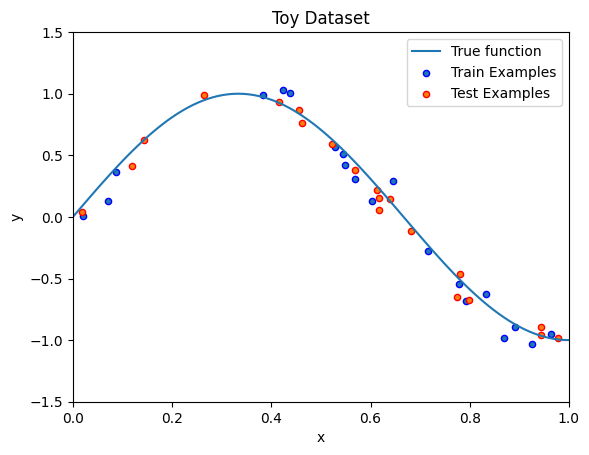

In [38]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()

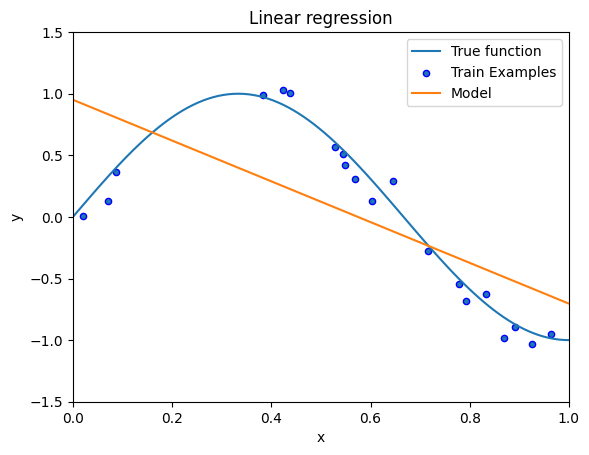

In [39]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

In [40]:
# Task 1

from sklearn.metrics import mean_squared_error

y_pred = linear_regression.predict(X_test[:, np.newaxis])
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1736489094130998


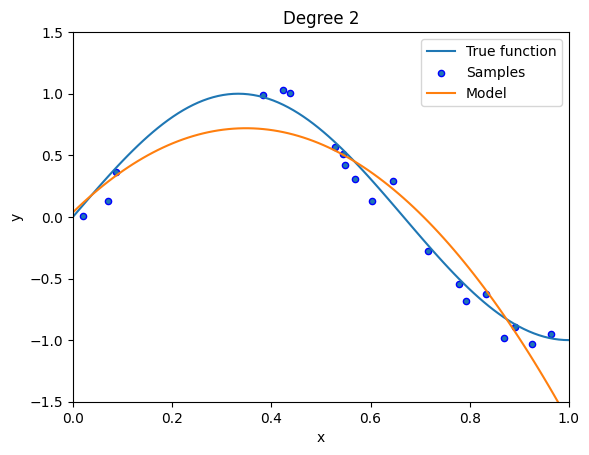

In [41]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(2, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 2")
plt.show()

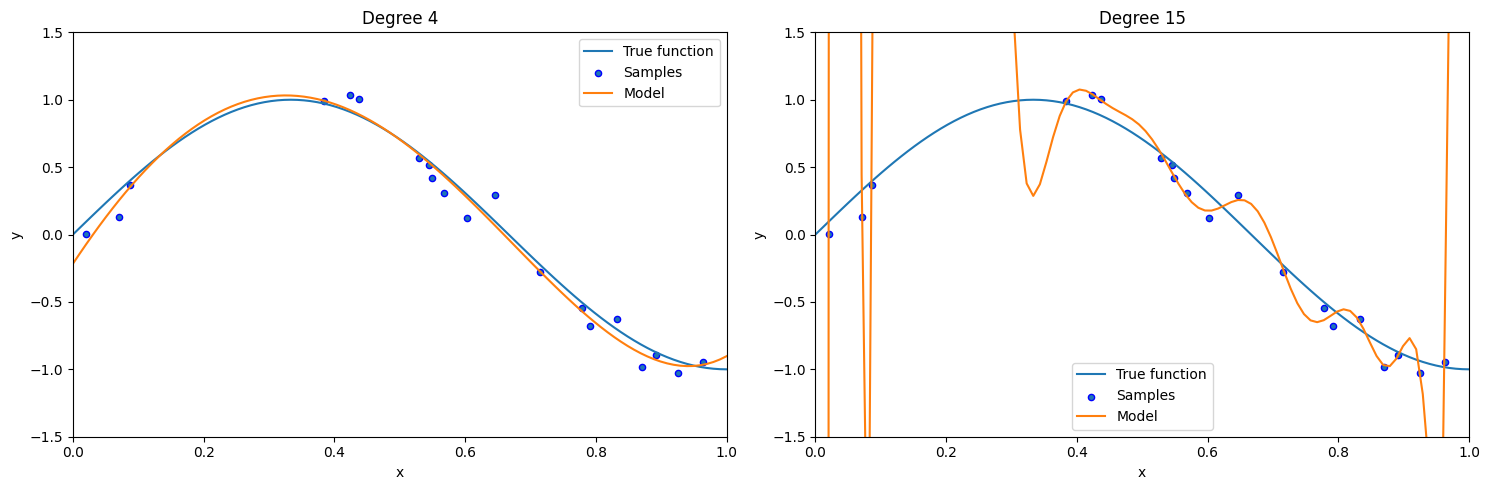

In [42]:
# Task 2

# Polynomial degree 4
polynomial_features_deg4 = PolynomialFeatures(4, include_bias=True)
q_model_deg4 = LinearRegression()
q_model_deg4.fit(polynomial_features_deg4.fit_transform(X_train[:, np.newaxis]), y_train)

# Polynomial degree 15
polynomial_features_deg15 = PolynomialFeatures(15, include_bias=True)
q_model_deg15 = LinearRegression()
q_model_deg15.fit(polynomial_features_deg15.fit_transform(X_train[:, np.newaxis]), y_train)

# Plotting
x = np.linspace(0, 1, 100)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model_deg4.predict(polynomial_features_deg4.transform(x[:, np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 4")

plt.subplot(1, 2, 2)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model_deg15.predict(polynomial_features_deg15.transform(x[:, np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 15")

plt.tight_layout()
plt.show()

In [43]:
# Task 3

# Polynomial degree 2
mse_deg2 = mean_squared_error(y_test, q_model.predict(polynomial_features.transform(X_test[:, np.newaxis])))

# Polynomial degree 4
mse_deg4 = mean_squared_error(y_test, q_model_deg4.predict(polynomial_features_deg4.transform(X_test[:, np.newaxis])))

# Polynomial degree 15
mse_deg15 = mean_squared_error(y_test, q_model_deg15.predict(polynomial_features_deg15.transform(X_test[:, np.newaxis])))

print("Mean Squared Error (Degree 2):", mse_deg2)
print("Mean Squared Error (Degree 4):", mse_deg4)
print("Mean Squared Error (Degree 15):", mse_deg15)

Mean Squared Error (Degree 2): 0.05626601819711916
Mean Squared Error (Degree 4): 0.004641799299812718
Mean Squared Error (Degree 15): 503.6525031549251


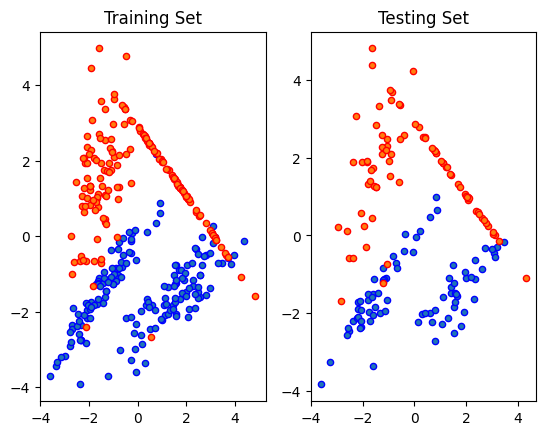

In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=500, n_features=2, n_classes=2,n_informative=2, n_redundant=0,n_clusters_per_class=2,
                           random_state=0,shuffle=True, class_sep=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)
colors = ["b", "r"]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Training Set")
ax2.set_title("Testing Set")

for c in np.unique(y_train):
    ax1.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,[X_train[i, 1] for i in np.where(y_train==c)],edgecolor=colors[c], s=20, label="Samples")
    ax2.scatter([X_test[i, 0] for i in np.where(y_test==c)] ,[X_test[i, 1] for i in np.where(y_test==c)],edgecolor=colors[c], s=20, label="Samples")

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=2,criterion="entropy",max_features="sqrt", max_samples=.8,random_state=0)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.9552238805970149
Testing Accuracy:  0.9212121212121213


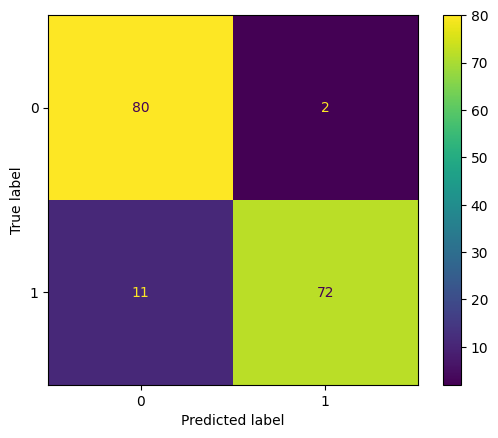

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [47]:
# Task 4

# Compute precision
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Compute recall
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Compute F1-score
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.972972972972973
Recall: 0.8674698795180723
F1-score: 0.9171974522292995


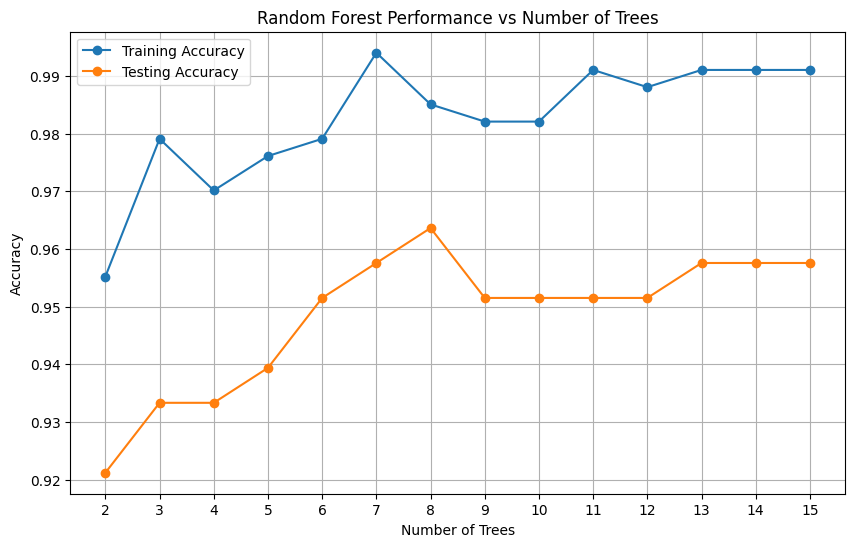

In [48]:
# Task 5

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Define range of number of trees
num_trees_range = range(2, 16)

for num_trees in num_trees_range:
    # Train Random Forest classifier
    clf = RandomForestClassifier(n_estimators=num_trees,criterion="entropy",max_features="sqrt", max_samples=.8,random_state=0)
    clf.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Compute training and testing accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(num_trees_range, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance vs Number of Trees')
plt.xticks(num_trees_range)
plt.legend()
plt.grid(True)
plt.show()

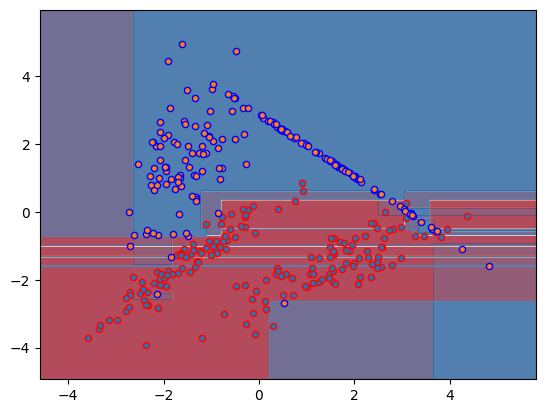

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

cmap = plt.cm.RdBu
plot_step = 0.02 # fine step width for decision surface contours
clf = RandomForestClassifier(n_estimators=2, criterion="entropy",max_features="sqrt", max_samples=.8,random_state=0)
clf.fit(X_train, y_train)
# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
estimator_alpha = 1.0 / len(clf.estimators_)

for tree in clf.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

colors = ["r", "b"]

for c in np.unique(y_train):
    plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,[X_train[i, 1] for i in np.where(y_train==c)],edgecolor=colors[c], s=20, label="Samples")

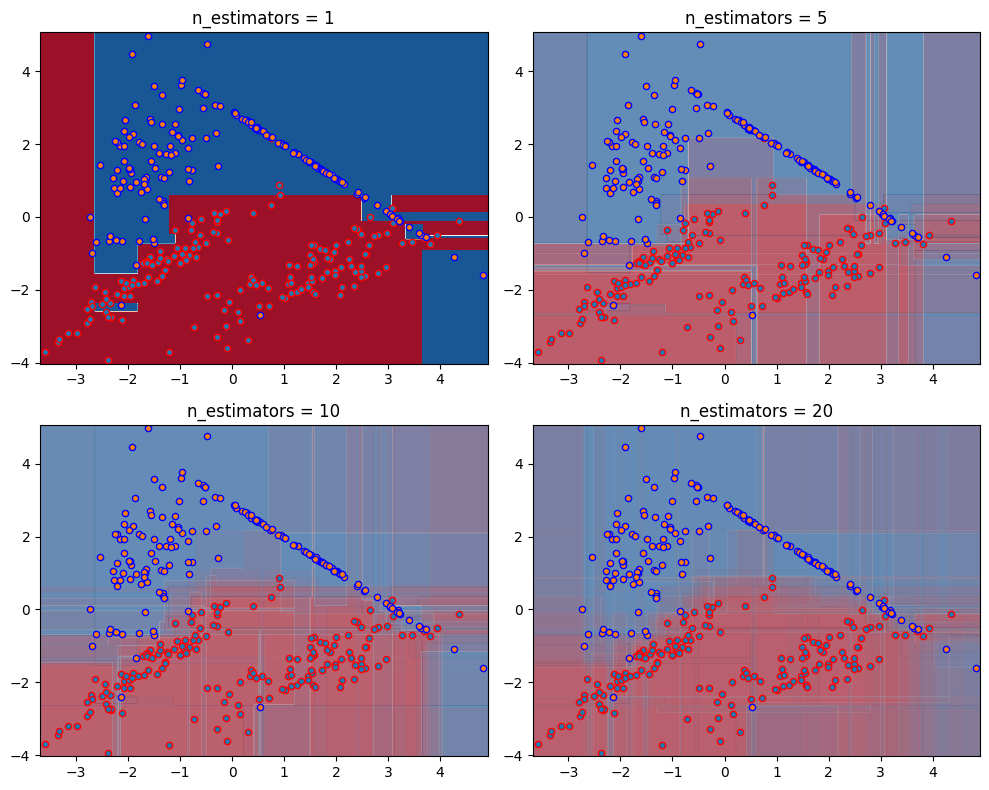

In [50]:
# Task 6

# Define colormap and plot step
cmap = plt.cm.RdBu
plot_step = 0.02

# Define a list of different number of trees
n_estimators_list = [1, 5, 10, 20]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axes.flatten()):
    # Instantiate RandomForestClassifier with different number of trees
    clf = RandomForestClassifier(n_estimators=n_estimators_list[i], criterion="entropy", max_features="sqrt", max_samples=.8, random_state=0)
    clf.fit(X_train, y_train)

    # Plot decision boundaries
    x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
    y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    estimator_alpha = 1.0 / len(clf.estimators_)

    for tree in clf.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = ax.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    colors = ["r", "b"]
    for c in np.unique(y_train):
        ax.scatter([X_train[i, 0] for i in np.where(y_train==c)], [X_train[i, 1] for i in np.where(y_train==c)], edgecolor=colors[c], s=20, label="Samples")

    ax.set_title("n_estimators = {}".format(n_estimators_list[i]))

plt.tight_layout()
plt.show()

In [51]:
from sklearn import svm

clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.8895522388059701
Testing Accuracy:  0.896969696969697


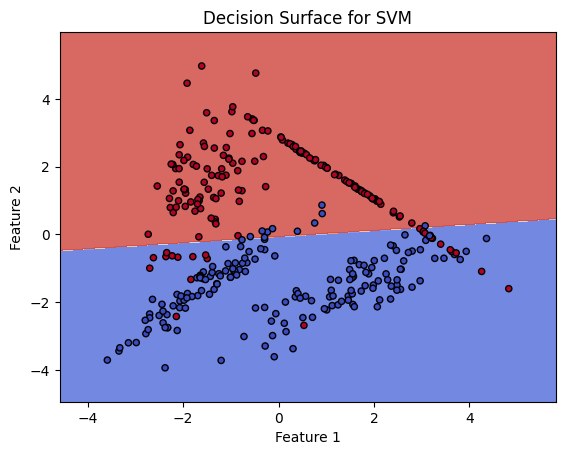

In [52]:
# Task 7

# Define meshgrid
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Create SVM model
clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)

# Predict the decision boundary
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Surface for SVM')
plt.show()


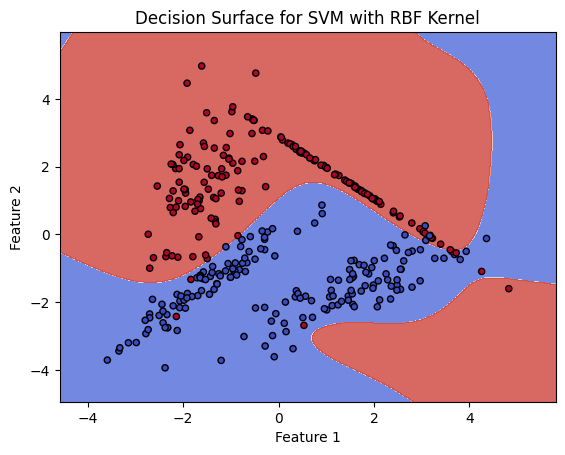

In [53]:
# Task 8

# Define meshgrid
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Create SVM model with RBF kernel
clf = svm.SVC(kernel="rbf", C=100, gamma='scale')
clf.fit(X_train, y_train)

# Predict the decision boundary
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Surface for SVM with RBF Kernel')
plt.show()

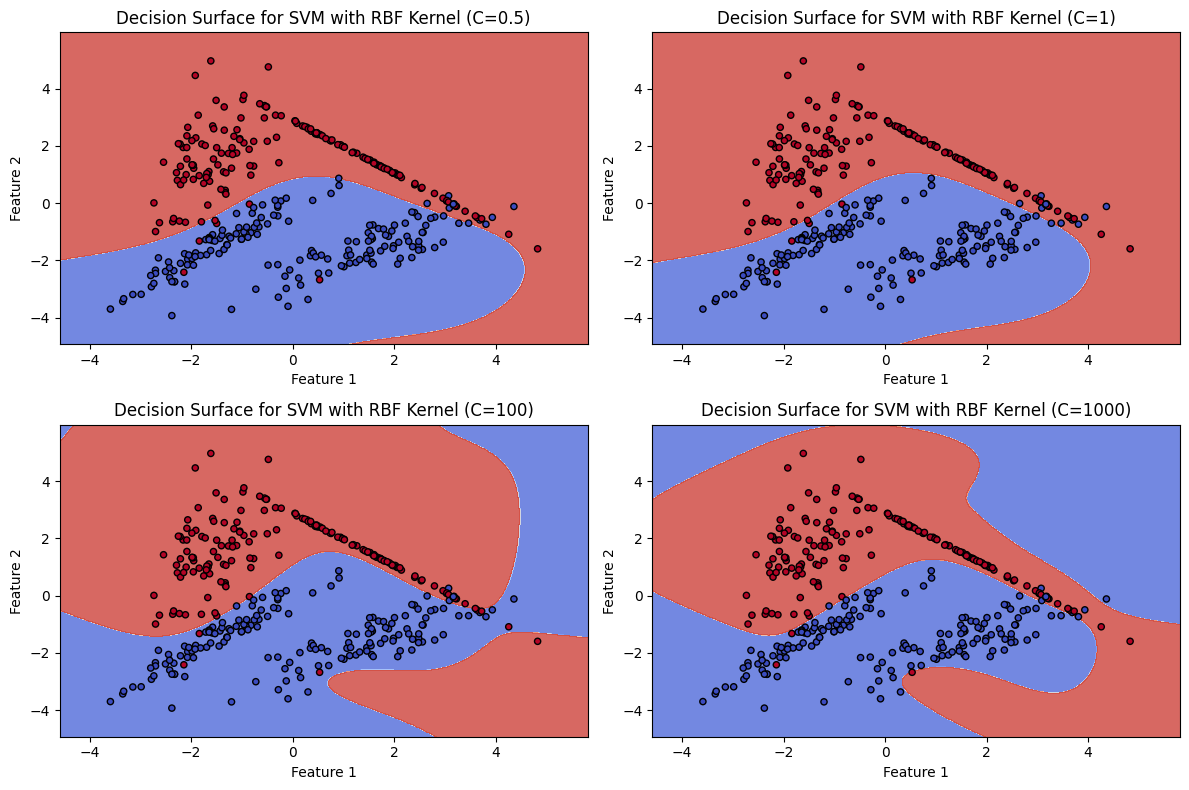

In [54]:
# Task 9

# Define meshgrid
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Values of C to iterate over
C_values = [0.5, 1, 100, 1000]

plt.figure(figsize=(12, 8))

for i, C in enumerate(C_values, 1):
    # Create SVM model with RBF kernel
    clf = svm.SVC(kernel="rbf", C=C, gamma='scale')  # You can adjust gamma as needed
    clf.fit(X_train, y_train)

    # Predict the decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Surface for SVM with RBF Kernel (C={})'.format(C))

plt.tight_layout()
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [56]:
# Task 10

print(clf.cv_results_)

{'mean_fit_time': array([0.00351939, 0.00262275, 0.00558386, 0.00156074, 0.01260686,
       0.00215263]), 'std_fit_time': array([0.00081901, 0.00011465, 0.00158695, 0.00010708, 0.00563229,
       0.00026334]), 'mean_score_time': array([0.00111217, 0.00136991, 0.00121889, 0.00077233, 0.00100389,
       0.00081367]), 'std_score_time': array([7.13488302e-05, 4.40661521e-05, 1.63161009e-04, 2.11237247e-05,
       1.36211069e-04, 8.54126232e-05]), 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}, {'C': 100, 'kernel': 'linear'}, {'C': 100, 'kernel': 'rbf'}]